# Calculate BMI the state graph for a sequential language model

In [42]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict

In [44]:
class BMIState(TypedDict):
    height: float  # in meters
    weight: float  # in kg
    bmi: float
    bmi_category: str


In [ ]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state.get("weight")
    height = state.get("height")
    state["bmi"] = weight / (height**2)
    return state

In [64]:
def classify_bmi(state: BMIState):
    bmi = state.get('bmi')
    if bmi < 18.5:
        state["bmi_category"] = "Underweight"
    elif 18.5 <= bmi < 24.9:
        state["bmi_category"] = "Normal weight"
    elif 25 <= bmi < 29.9:
        state["bmi_category"] = "Overweight"
    else:
        state["bmi_category"] = "Obesity"
    return state

In [65]:
graph = StateGraph(BMIState)

# add nodes
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("classify_bmi", classify_bmi)

# add edges
graph.add_edge(START, "calculate_bmi")  # start to calculate BMI
graph.add_edge("calculate_bmi", "classify_bmi")  # calculate BMI to classify BMI
graph.add_edge("classify_bmi", END)  # classify BMI to end


# compile and execute
workflow = graph.compile()

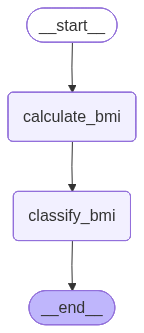

In [57]:
# Visualize the created workflow

from IPython.display import Image, display

# Standard Mermaid rendering
display(Image(workflow.get_graph().draw_mermaid_png()))

In [68]:
# Initial state before executing the workflow
initialState = {
    "weight": 120,
    "height": 1.23
}

In [70]:
# Invoke workflow and retrieve final state
final_state = workflow.invoke(initialState)
print(final_state)

{'height': 1.23, 'weight': 120, 'bmi': 79.3178663493952, 'bmi_category': 'Obesity'}
